In [185]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import tree, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.cross_validation import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [127]:
# setting OS directory
os.chdir('C:\\Users\\rckar\\OneDrive\\Documents\\MSBA\\Fall Semester\\6420 Predictive Analytics\\HW1')

In [128]:
df = pd.read_csv("wdbc.data", header = None)

In [129]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
col_names = ['id','diagnosis',
                 'radius_mean','texture_mean','perimeter_mean','area_mean',
                 'smoothness_mean','compactness_mean','concavity_mean',
                 'concave points_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_se','texture_se','perimeter_se','area_se',
                 'smoothness_se','compactness_se','concavity_se','concave points_se',
                 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                 'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

df.columns = col_names

In [131]:
df.isnull().values.any()

False

In [132]:
df['diagnosis_class'],class_names = pd.factorize(df['diagnosis'])

In [133]:
X_df = df.iloc[:,2:32]
y_df = df.iloc[:,32:]

In [134]:
X_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [135]:
y_df.head()

,diagnosis_class
0,0
1,0
2,0
3,0
4,0


## Decision Tree

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97560976 1.         0.875      0.85       0.9        0.925
 0.9        0.94871795 0.92307692 0.94871795]
Accuracy: 0.92 (+/- 0.09)


In [144]:
# training accuracy
clf.fit(X_train, y_train).score(X_train, y_train)

1.0

In [145]:
#testing accuracy
clf.fit(X_train, y_train).score(X_test, y_test)

0.9415204678362573

In [146]:
# Hyper-param tuning
complexity_values = range(1,10)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    #clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    #clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value,max_leaf_nodes  =10)
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value,min_impurity_decrease=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))

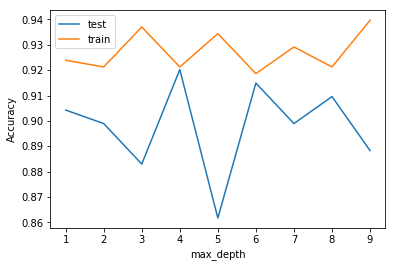

In [147]:
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

In [148]:
test_accuracies

[0.9042553191489362,
 0.898936170212766,
 0.8829787234042553,
 0.9202127659574468,
 0.8617021276595744,
 0.9148936170212766,
 0.898936170212766,
 0.9095744680851063,
 0.8882978723404256]

In [149]:
train_accuracies

[0.9238845144356955,
 0.9212598425196851,
 0.937007874015748,
 0.9212598425196851,
 0.9343832020997376,
 0.9186351706036745,
 0.9291338582677166,
 0.9212598425196851,
 0.9396325459317585]

In [178]:
# Final model
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4,min_impurity_decrease=0.1)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

In [180]:
print(clf.fit(X_train, y_train).score(X_test, y_test))
print(clf.fit(X_train, y_train).score(X_train, y_train))

0.9122807017543859
0.9246231155778895


In [181]:
y_pred = clf.predict(X_test)

In [183]:
print(confusion_matrix(y_test, y_pred))

[[ 55  10]
 [  5 101]]


In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        65
           1       0.91      0.95      0.93       106

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [186]:
print(accuracy_score(y_test, y_pred))

0.9122807017543859


In [187]:
import copy
X_df_copy = copy.deepcopy(X_df)
y_df_copy = copy.deepcopy(y_df)

## Logistic Regression 

In [193]:
from sklearn import linear_model

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

clf_logit = linear_model.LogisticRegression()

clf_logit.fit(X_train, y_train)

scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.90243902 0.975      0.925      0.95       0.975      0.875
 0.95       0.97435897 0.84615385 0.92307692]
Accuracy: 0.93 (+/- 0.08)


C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
# training accuracy
clf_logit.fit(X_train, y_train).score(X_train, y_train)

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9698492462311558

In [196]:
#testing accuracy
clf_logit.fit(X_train, y_train).score(X_test, y_test)

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.935672514619883

In [197]:
y_pred = clf_logit.predict(X_test)

In [198]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[67  8]
 [ 3 93]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        75
           1       0.92      0.97      0.94        96

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

0.935672514619883
